In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('game_data.csv', index_col=False)

cols = ['Player Type','Player Levels','Opponent Type','Opponent Levels','Player Score','Opponent Score','Score Differential','Player Pieces Left','Opponent Pieces Left','# rounds','w1 - score per opp dot','w2 - opp dot dist from player start','w3 - score per opp dot open corners #','w4 - score per player dot','w5 - player dot dist from opp start','w6 - score per player dot open corners #','w7 - player score multiplier','w8 - opponent score multiplier','w9 - piece difficulty weight','only 5s rounds','rounds choosing only difficult pieces','# of difficult pieces included']

print(df.head)
print(df.ndim, ' dimensions')
print(df.shape, ' shape')
print(df.size, ' size')


<bound method NDFrame.head of       Player_Type                Player_Levels Opponent_Type  \
0    playSmart_v2                     [[0, 1]]    randomTurn   
1      randomTurn                     [[0, 1]]  playSmart_v2   
2      randomTurn                     [[0, 1]]  playSmart_v1   
3    playSmart_v1                     [[0, 1]]    randomTurn   
4    playSmart_v1                     [[0, 1]]  playSmart_v2   
..            ...                          ...           ...   
177    randomTurn           [[541, 1], [0, 2]]  playSmart_v2   
178  playSmart_v1                       [0, 1]  playSmart_v1   
179  playSmart_v1                     [[0, 1]]  playSmart_v1   
180  playSmart_v2                     [[0, 1]]  playSmart_v2   
181  playSmart_v2  [[290, 1], [26, 2], [0, 3]]  playSmart_v2   

                 Opponent_Levels  Player_Score  Opponent_Score  \
0                       [[0, 1]]            40              51   
1                       [[0, 1]]            51              40   
2  

4      playSmart_v1
5      playSmart_v2
6      playSmart_v1
7      playSmart_v1
14     playSmart_v1
           ...     
173    playSmart_v1
178    playSmart_v1
179    playSmart_v1
180    playSmart_v2
181    playSmart_v2
Name: Player_Type, Length: 66, dtype: object


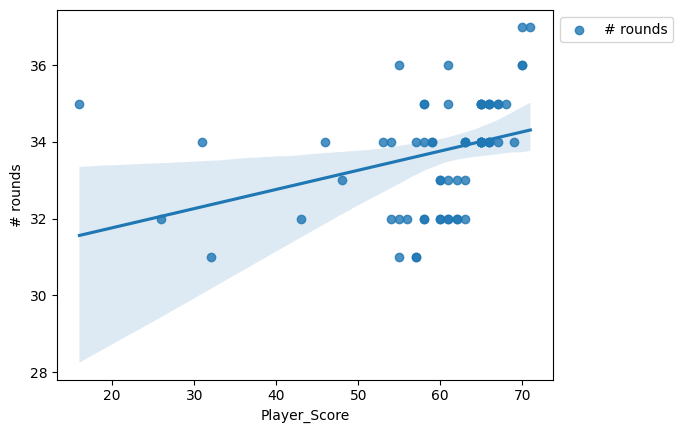

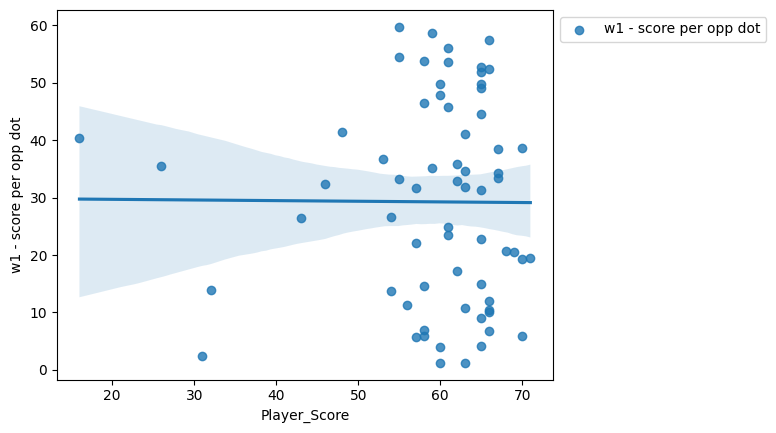

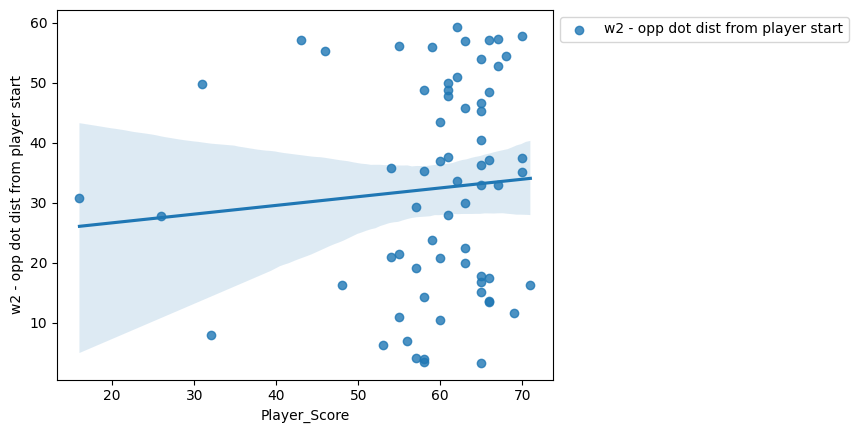

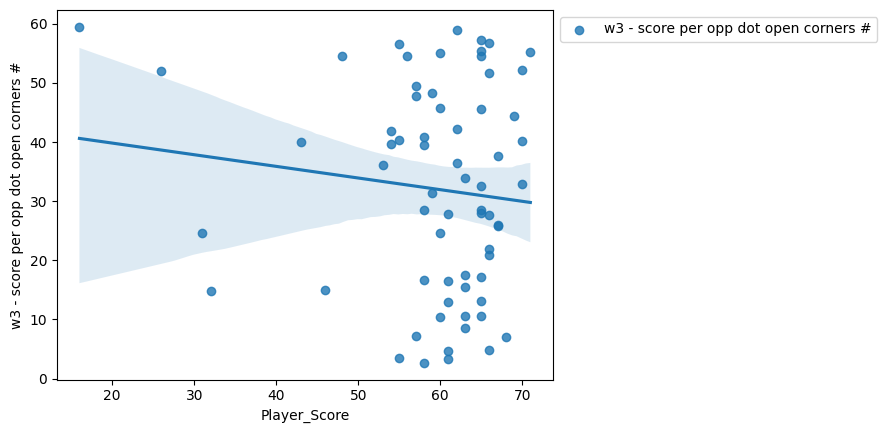

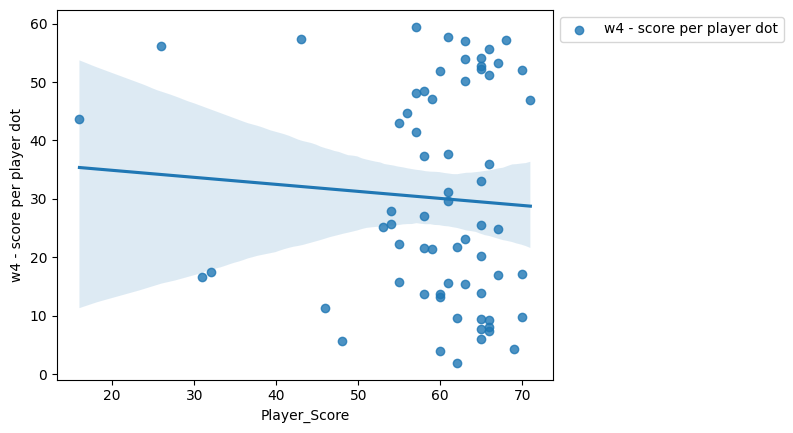

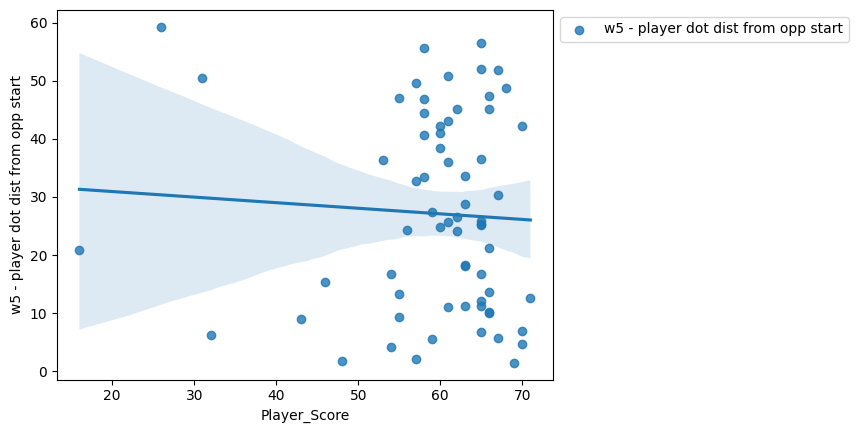

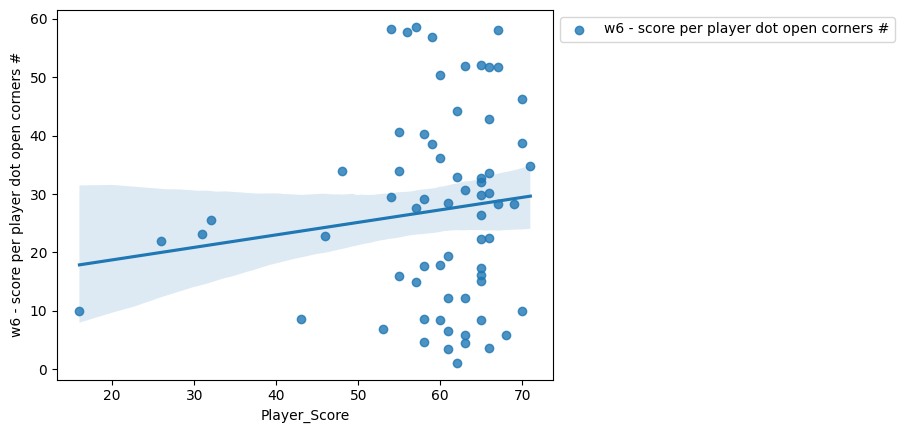

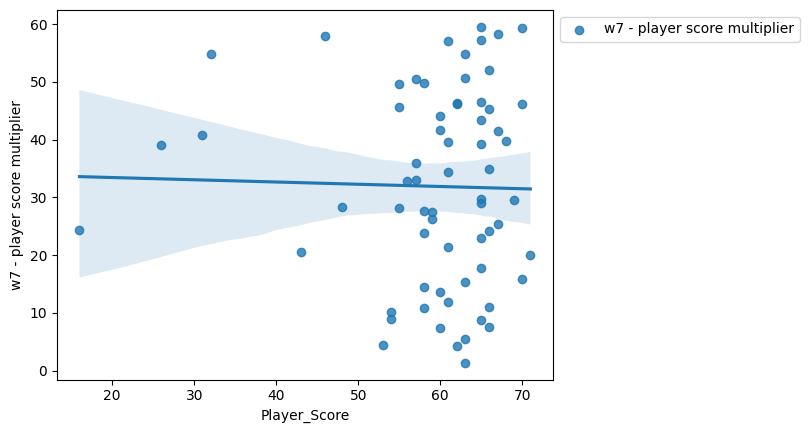

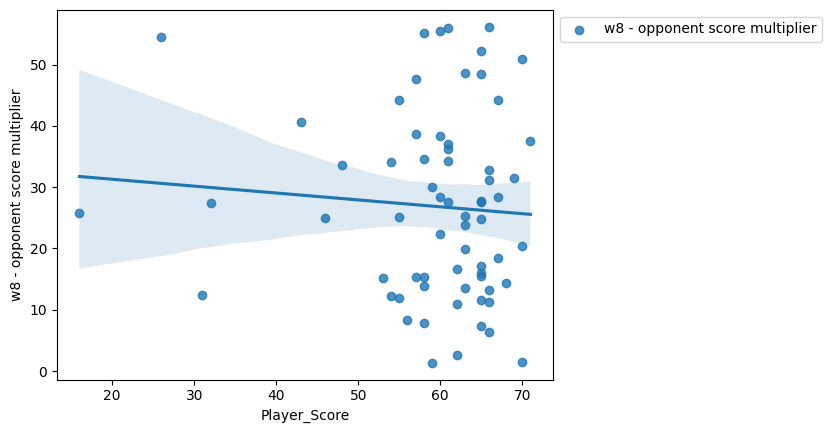

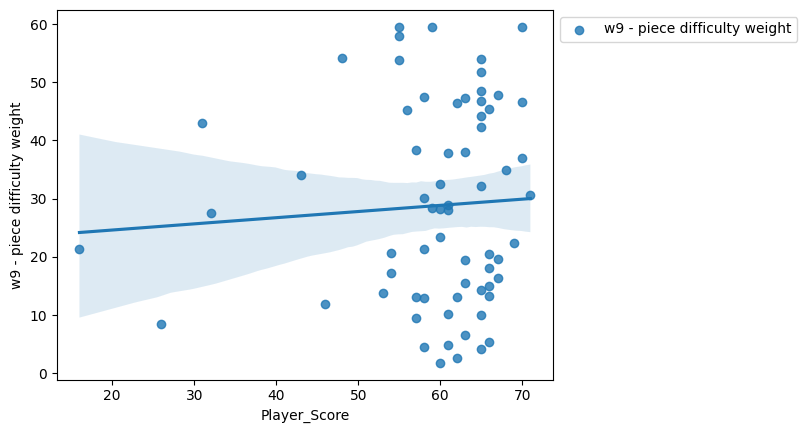

In [37]:
import seaborn as sns


df_no_random = df.drop(df[df['Player_Type'] == 'randomTurn'].index)
df_no_random = df_no_random.drop(df_no_random[df_no_random['Opponent_Type'] == 'randomTurn'].index)
print(df_no_random.loc[:, 'Player_Type'])
cols = ['# rounds', 'w1 - score per opp dot','w2 - opp dot dist from player start','w3 - score per opp dot open corners #','w4 - score per player dot','w5 - player dot dist from opp start','w6 - score per player dot open corners #','w7 - player score multiplier','w8 - opponent score multiplier','w9 - piece difficulty weight']
for col in cols:
    ax = sns.regplot(x="Player_Score", y=col, data=df_no_random, label=col)
    plt.legend(fontsize=10)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()


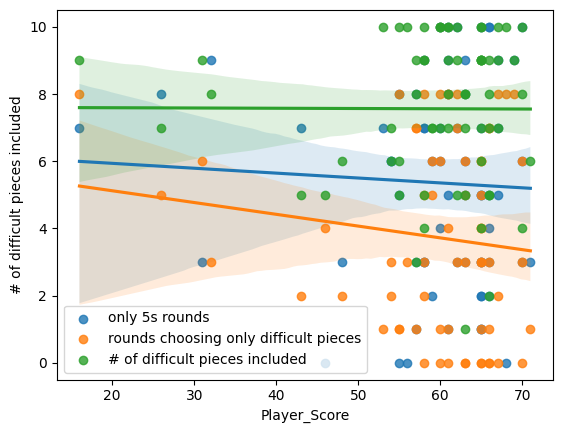

In [38]:
cols = ['only 5s rounds','rounds choosing only difficult pieces','# of difficult pieces included']
for col in cols:
    sns.regplot(x="Player_Score", y=col, data=df_no_random, label=col)
plt.legend(fontsize=10)
plt.show()



In [39]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 


# creating feature variables 
cols = ['w1 - score per opp dot','w2 - opp dot dist from player start','w3 - score per opp dot open corners #','w4 - score per player dot','w5 - player dot dist from opp start','w6 - score per player dot open corners #','w7 - player score multiplier','w8 - opponent score multiplier','w9 - piece difficulty weight', 'only 5s rounds','rounds choosing only difficult pieces','# of difficult pieces included']

x = df_no_random.filter(cols, axis=1)

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(x)
x = pd.DataFrame(d, columns=x.columns)

y = df_no_random['Score_Differential'] 
print(x) 
print(y)

x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size=0.3, random_state=101) 

model = LinearRegression() 
model.fit(x_train,y_train)

predictions = model.predict(x_test) 

# model evaluation 
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 



    w1 - score per opp dot  w2 - opp dot dist from player start  \
0                 0.894588                             0.792874   
1                 0.829885                             0.599661   
2                 0.094843                             0.962057   
3                 0.531221                             0.928594   
4                 0.000000                             0.126227   
..                     ...                                  ...   
61                0.313047                             0.232166   
62                0.235706                             0.209802   
63                0.636316                             0.884396   
64                0.899080                             0.012581   
65                0.551408                             0.963383   

    w3 - score per opp dot open corners #  w4 - score per player dot  \
0                                0.035752                   0.622511   
1                                0.759591          

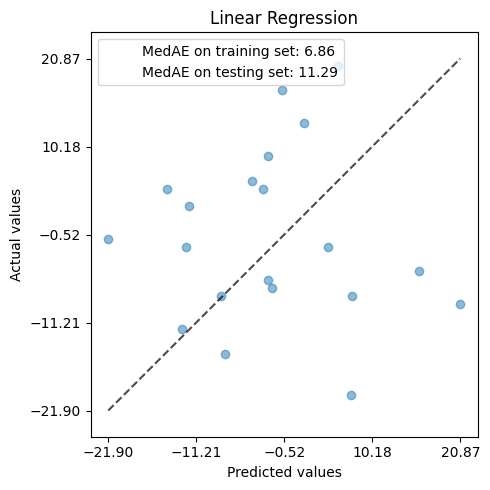

In [40]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, model.predict(x_train))
y_pred = model.predict(x_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f}",
    "MedAE on testing set": f"{mae_test:.2f}",
}

_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Linear Regression")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

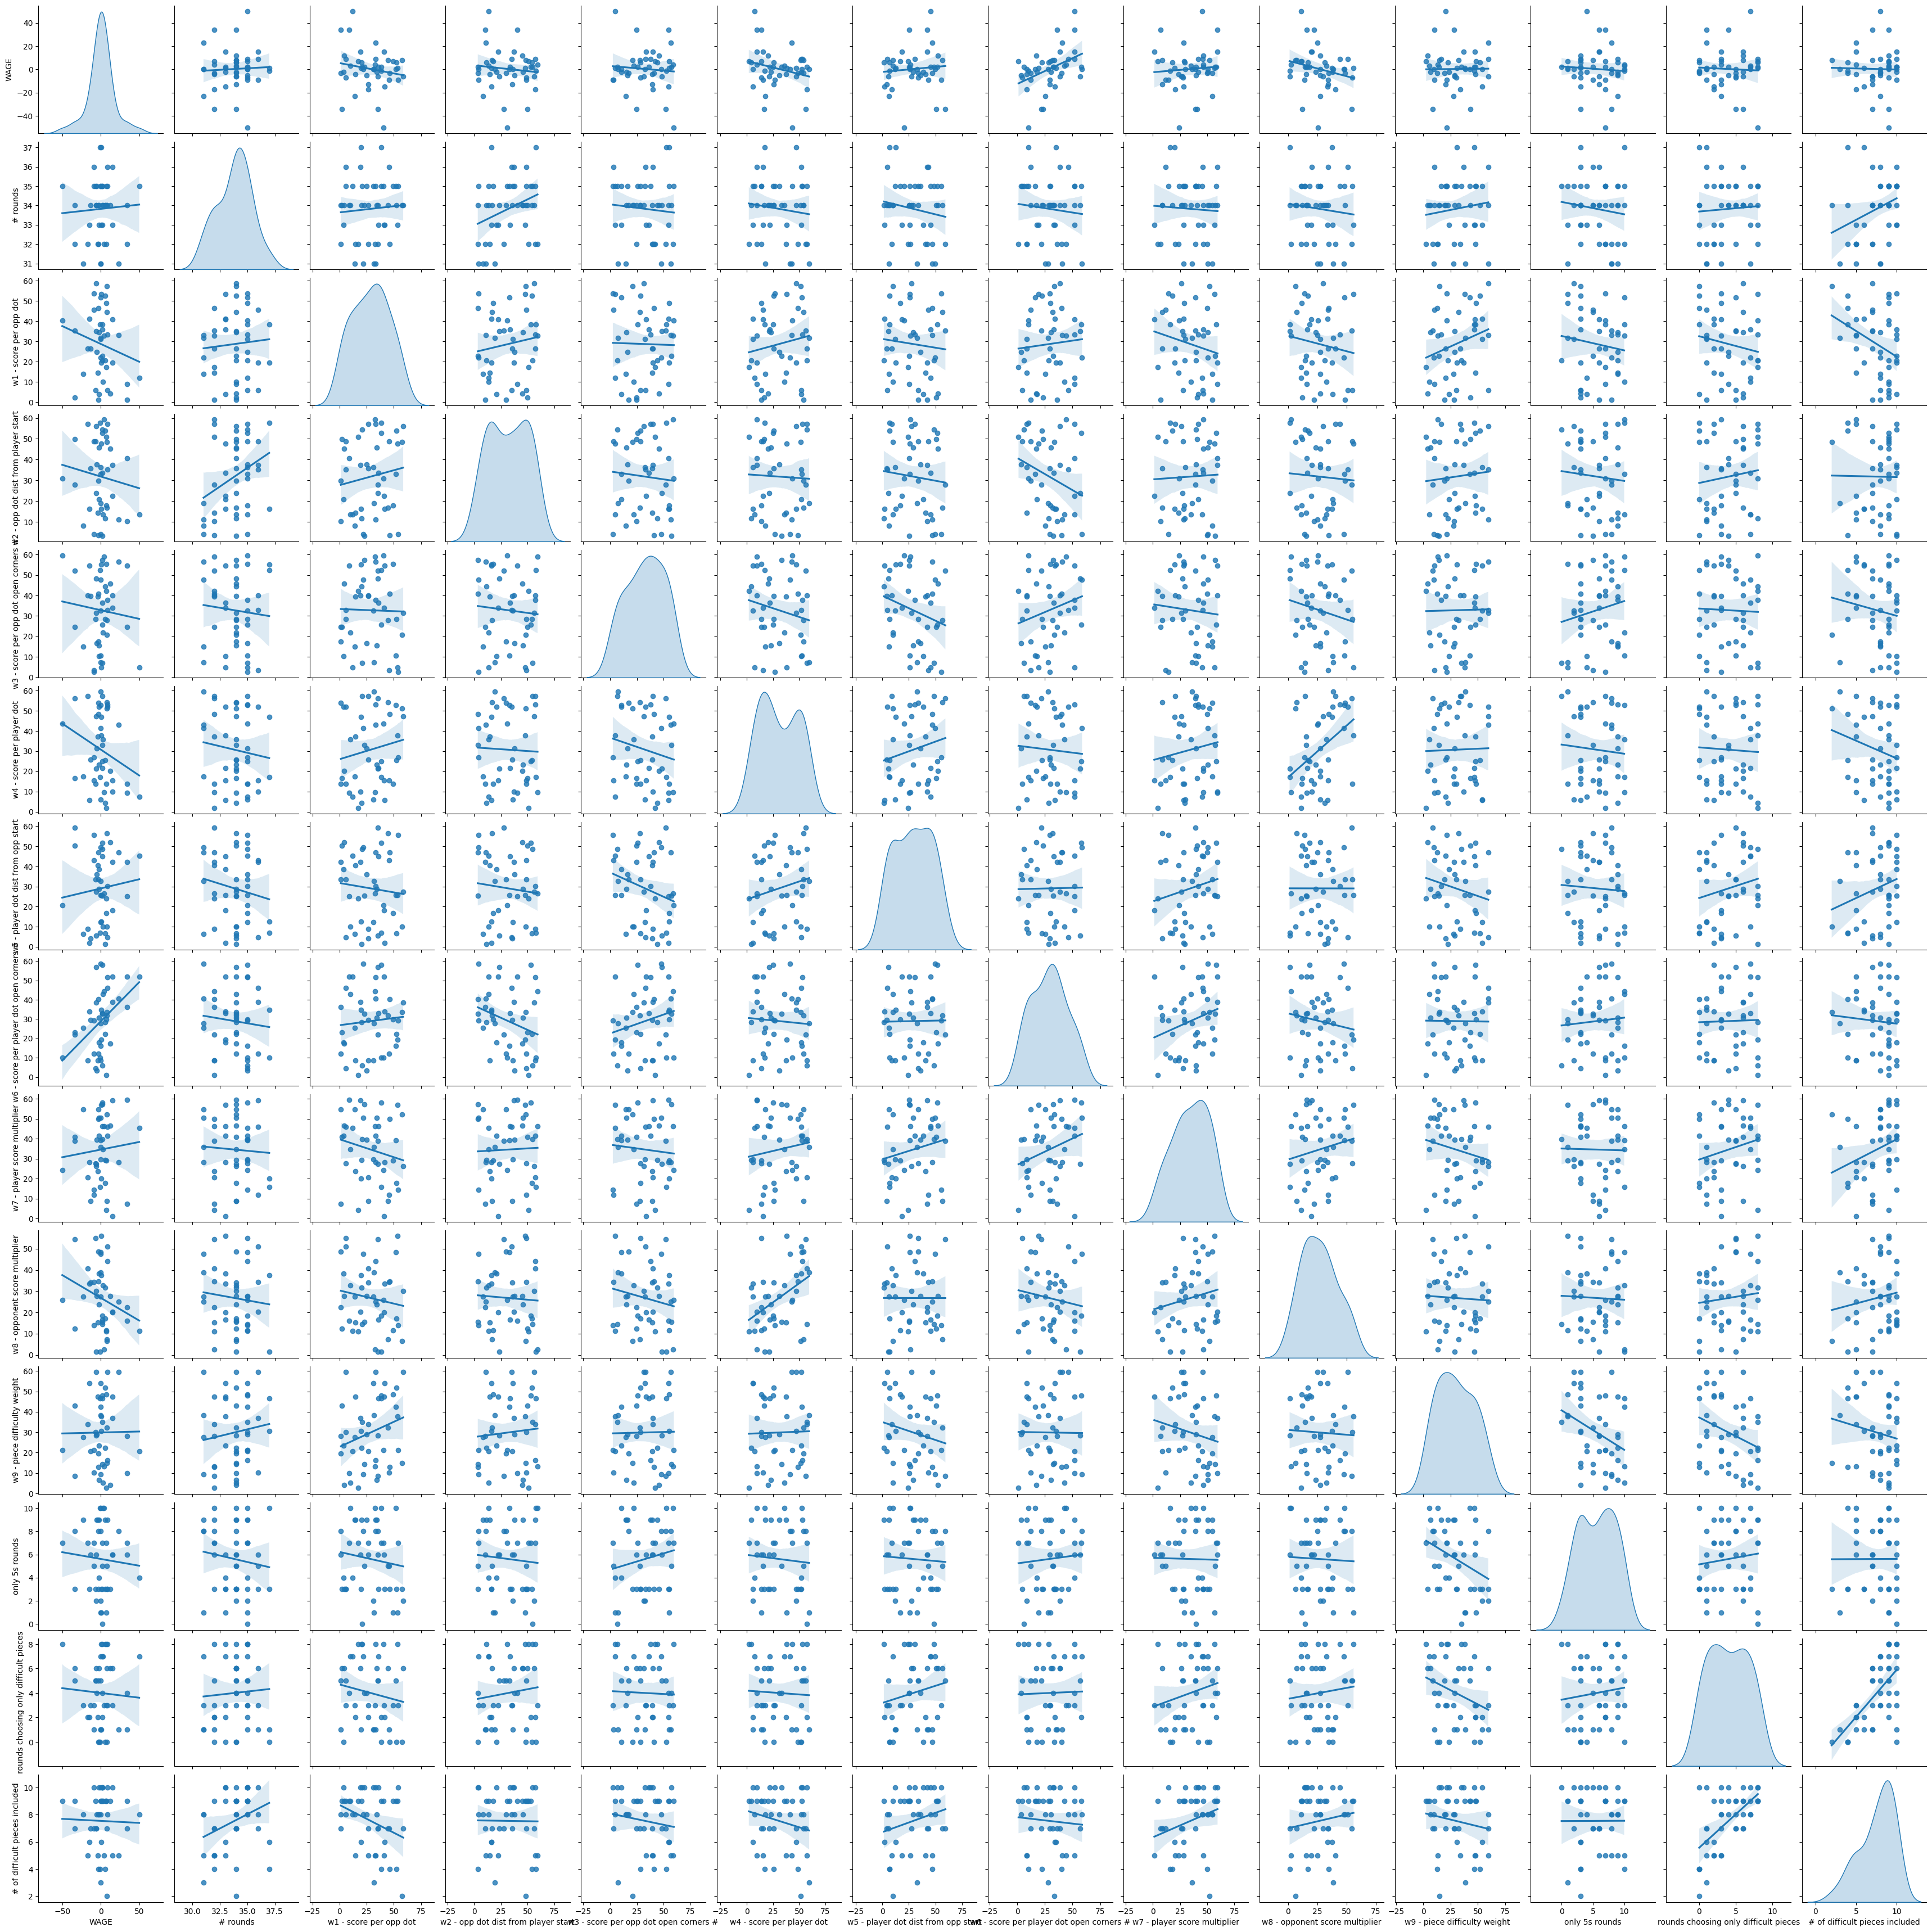

In [6]:
train_dataset = x_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

In [53]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print(mlp.score(x_test, y_test))

from sklearn.neighbors import KNeighborsRegressor

kng = KNeighborsRegressor(n_neighbors=2)
kng.fit(x_train,y_train)

predict_train = kng.predict(x_train)
predict_test = kng.predict(x_test)
print(kng.score(x_test, y_test))

-1.900924166890769
-1.759325317143464


C:\Users\jjfri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
import tensorflow as tf
import keras

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='relu')
])
model.compile(optimizer='sgd', loss='mse', metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(x_train, y_train, batch_size=32, epochs=10)
model.summary()

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 275.9977 - sparse_categorical_accuracy: 0.0747  
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 248.1512 - sparse_categorical_accuracy: 0.0747  
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 270.1711 - sparse_categorical_accuracy: 0.0539  
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 264.1756 - sparse_categorical_accuracy: 0.0394  
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 272.5722 - sparse_categorical_accuracy: 0.0394 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 240.2029 - sparse_categorical_accuracy: 0.0498 
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 277.3748 - sparse_categorical_accuracy: 0.0643 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 247.9498 - sparse_categorical_accuracy: 0.0747 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 263.9239 - sparse_categorical_accuracy: 0.0394 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 254.320

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,712 (10.60 KB)

 Trainable params: 2,510 (9.80 KB)

 Non-trainable params: 200 (800.00 B)

 Optimizer params: 2 (12.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - loss: 198.9067 - sparse_categorical_accuracy: 0.0588 - val_loss: 443.9382 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 195.6997 - sparse_categorical_accuracy: 0.0588 - val_loss: 444.9143 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 192.8962 - sparse_categorical_accuracy: 0.0588 - val_loss: 444.3284 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 191.1109 - sparse_categorical_accuracy: 0.0882 - val_loss: 444.4638 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 189.0772 - sparse_categorical_accuracy: 0.0882 - val_loss: 444.8347 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 187.1652 - sparse_categorical_accuracy: 0.0882 - val_loss: 445.0794 - val_sparse_

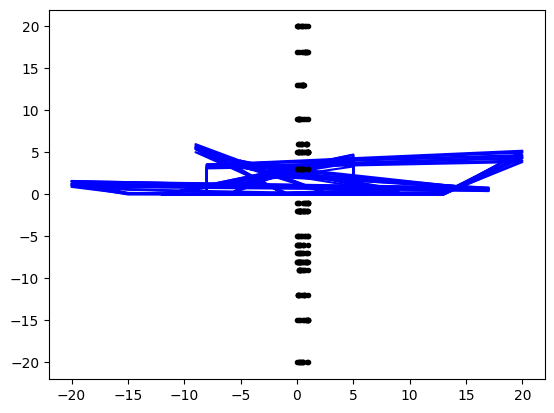

In [71]:
history = model.fit(x_train, y_train, validation_split=0.25,batch_size=64, epochs=200,shuffle=True)
loss = model.evaluate(x_test,y_test,batch_size=None)
predict=model.predict(x_test)
plt.plot()
plt.plot(y_test, predict, 'b', x_test , y_test, 'k.')